In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
#holiday
holiday = pd.read_csv('holidays_events.csv')

#essential metadata
items = pd.read_csv('items.csv')
stores = pd.read_csv('stores.csv')

#miscellanous
oil = pd.read_csv('oil.csv')
transactions = pd.read_csv('transactions.csv')

#main
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


C:\Windows\Temp\ipykernel_6948\2166635275.py:14: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [3]:
def store_demographic(t,s):
    t = t.merge(s, on = 'store_nbr', how = 'left')
    t['date'] = pd.to_datetime(t.date)
    t['year'] = t['date'].dt.year
    t['month'] = t.date.dt.month
    t['day'] = t.date.dt.day
    return t

def holiday_demographic(t,h):
    h = h.rename(columns = {'type':'holiday_type'}) #to avoid confusion with store type
    t = t.merge(h, on = 'date', how = 'left')
    t['date'] = pd.to_datetime(t.date)
    t['year'] = t['date'].dt.year
    t['month'] = t.date.dt.month
    t['day'] = t.date.dt.day
    return t

def oil_effect(t, o):
    t = t.merge(o, on = 'date', how = 'left')
    t['date'] = pd.to_datetime(t.date)
    t['year'] = t['date'].dt.year
    t['month'] = t.date.dt.month
    t['day'] = t.date.dt.day
    return t

In [4]:
def wrangle(train):
    #### Data Selection
    # as describe, 16% of onpromotion column's values are missing.
    # given the large size of the data, it's okay to still discard 16% of the dataset
    data = train.copy()
    data = data.dropna()
    storeinfo = stores.copy()
    storeinfo.rename(columns = {'type':'store_type'},inplace = True)
    iteminfo = items.copy()
    holidayinfo = holiday[['date','type']].copy()
    holidayinfo.rename(columns = {'type':'holiday_type'},inplace = True)
    
    data = data.merge(storeinfo, on='store_nbr', how='left')
    data = data.merge(iteminfo, on = 'item_nbr', how = 'left')
    data = data.merge(holidayinfo, on ='date', how = 'left')
    
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data.date.dt.month
    data['day'] = data.date.dt.day
    dropcols = ['id','date','store_nbr','item_nbr','class']
    data = data.drop(columns = dropcols)
    
    return data

In [5]:
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [6]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [7]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [8]:
test.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [9]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


# Data Exploration will be divided into 3 sections. Transaction by Store Type, Transaction by Holiday Type, Transaction with Oil

## Transaction by Store Type

In [10]:
#checking popularity
store_rating = store_demographic(transactions, stores)
#bystore = store_rating.groupby(['store_nbr'])['transactions'].sum().reset_index()
#byyear = store_rating.groupby(['year','store_nbr'])['transactions'].sum().reset_index()
#bymonth = store_rating.groupby(['month','store_nbr'])['transactions'].sum().reset_index()
#byday = store_rating.groupby(['day','store_nbr'])['transactions'].sum().reset_index()

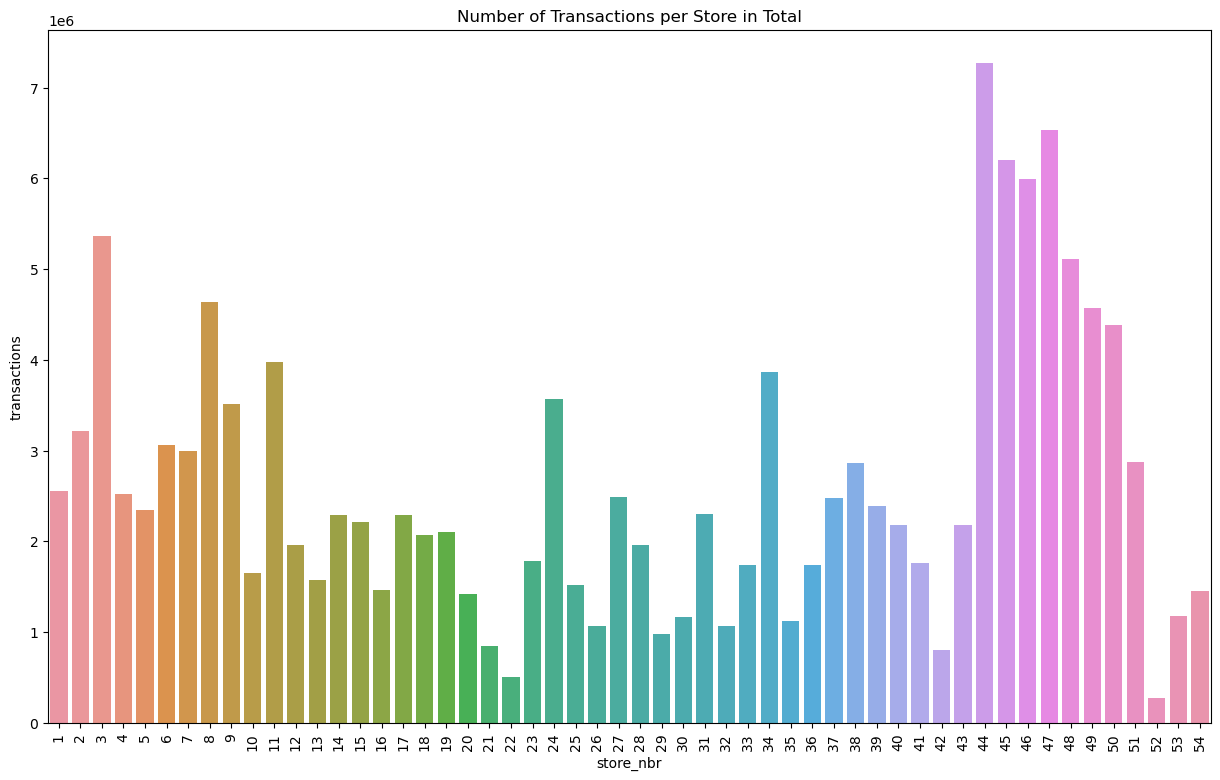

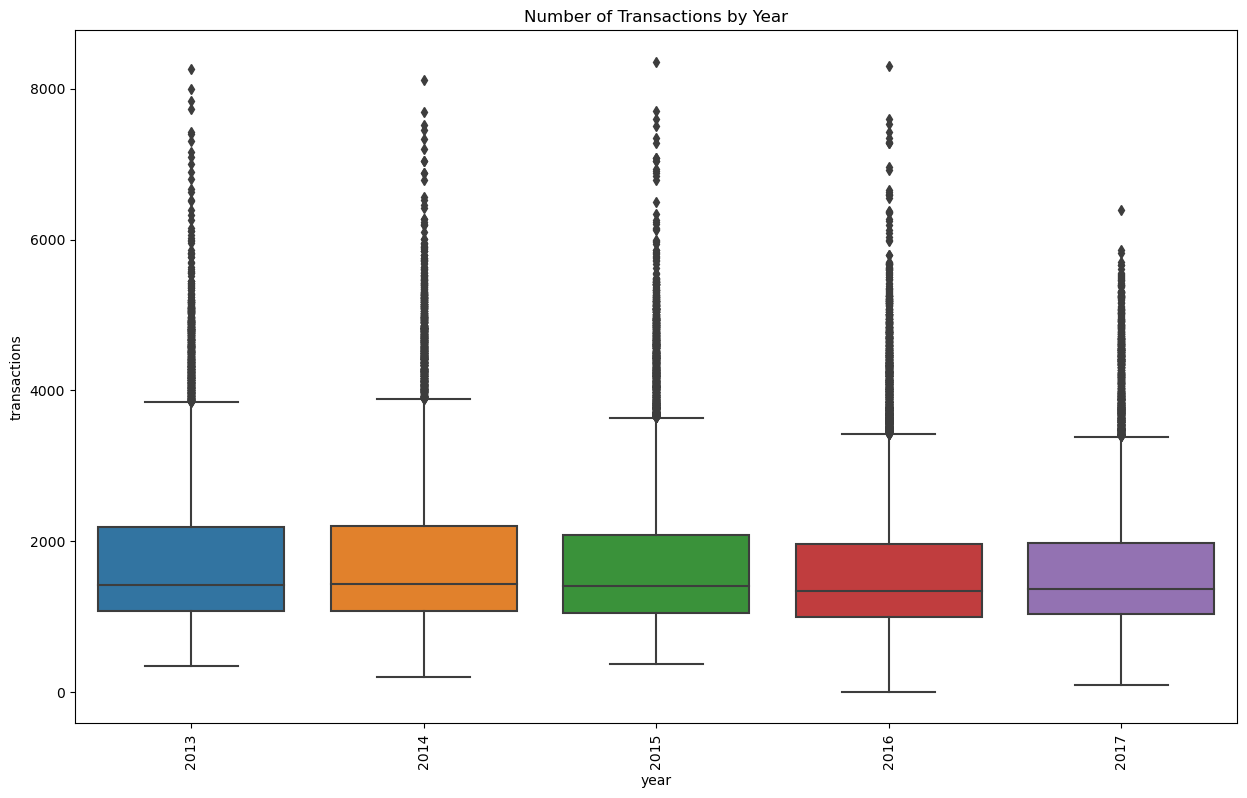

In [11]:
#overall popularity
fig = plt.figure(figsize=(15,9))
sns.barplot(data = store_rating, x = 'store_nbr', y ='transactions',estimator=sum, errorbar = None)
plt.xticks(rotation=90)
plt.title('Number of Transactions per Store in Total')
plt.show()

### popularity by year
fig = plt.figure(figsize=(15,9))
sns.boxplot(data = store_rating, x = 'year', y ='transactions')
plt.xticks(rotation=90)
plt.title('Number of Transactions by Year')
plt.show()

In [12]:
print(store_rating.date.max())
print(store_rating.date.min())

2017-08-15 00:00:00
2013-01-01 00:00:00


#### Let's compare the date if it's only until month 8. Because year 2017 is suspiciously low compared to other year

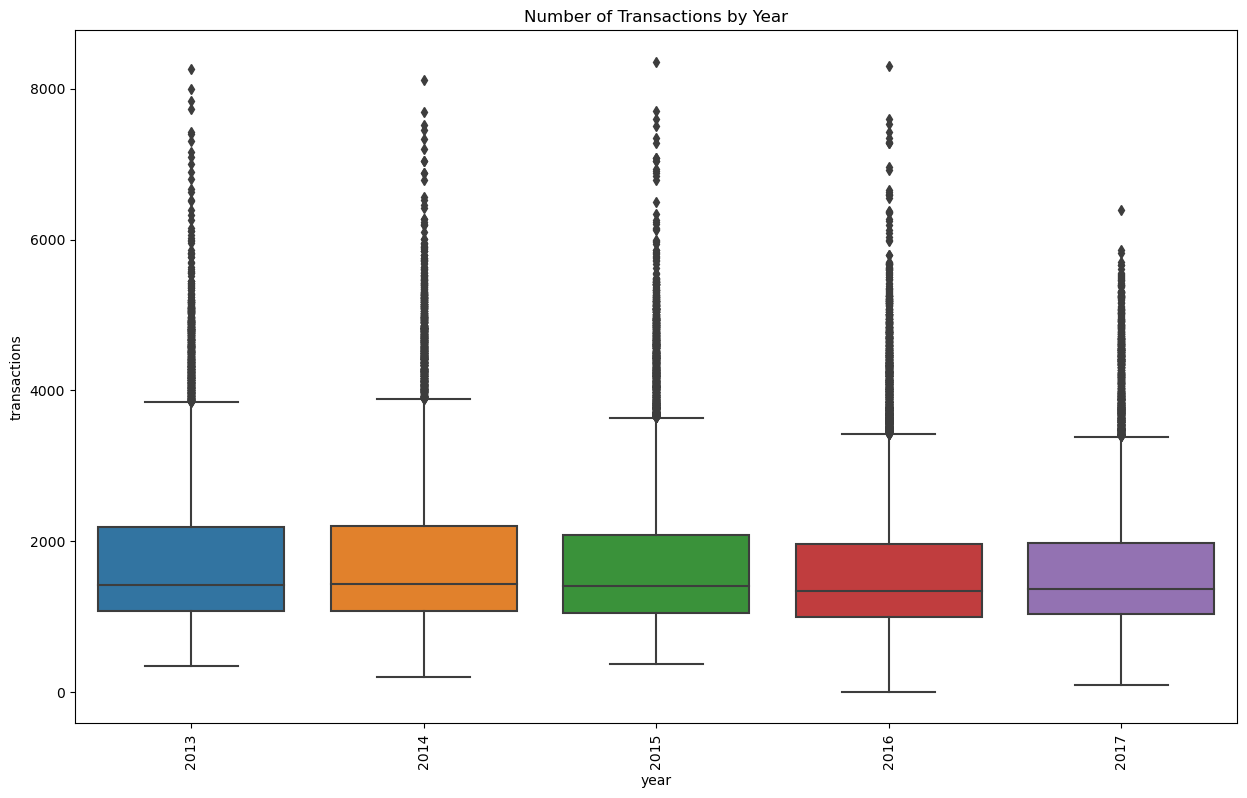

In [13]:
bymonth = store_rating[store_rating.month <= 8]
### popularity by year
fig = plt.figure(figsize=(15,9))
sns.boxplot(data = store_rating, x = 'year', y ='transactions')
plt.xticks(rotation=90)
plt.title('Number of Transactions by Year')
plt.show()

In [14]:
print(store_rating.groupby('year')['transactions'].sum())
print(bymonth.groupby('year')['transactions'].sum())

year
2013    29107173
2014    30006929
2015    31312370
2016    31052337
2017    20000136
Name: transactions, dtype: int64
year
2013    18985539
2014    19555107
2015    20478553
2016    20363876
2017    20000136
Name: transactions, dtype: int64


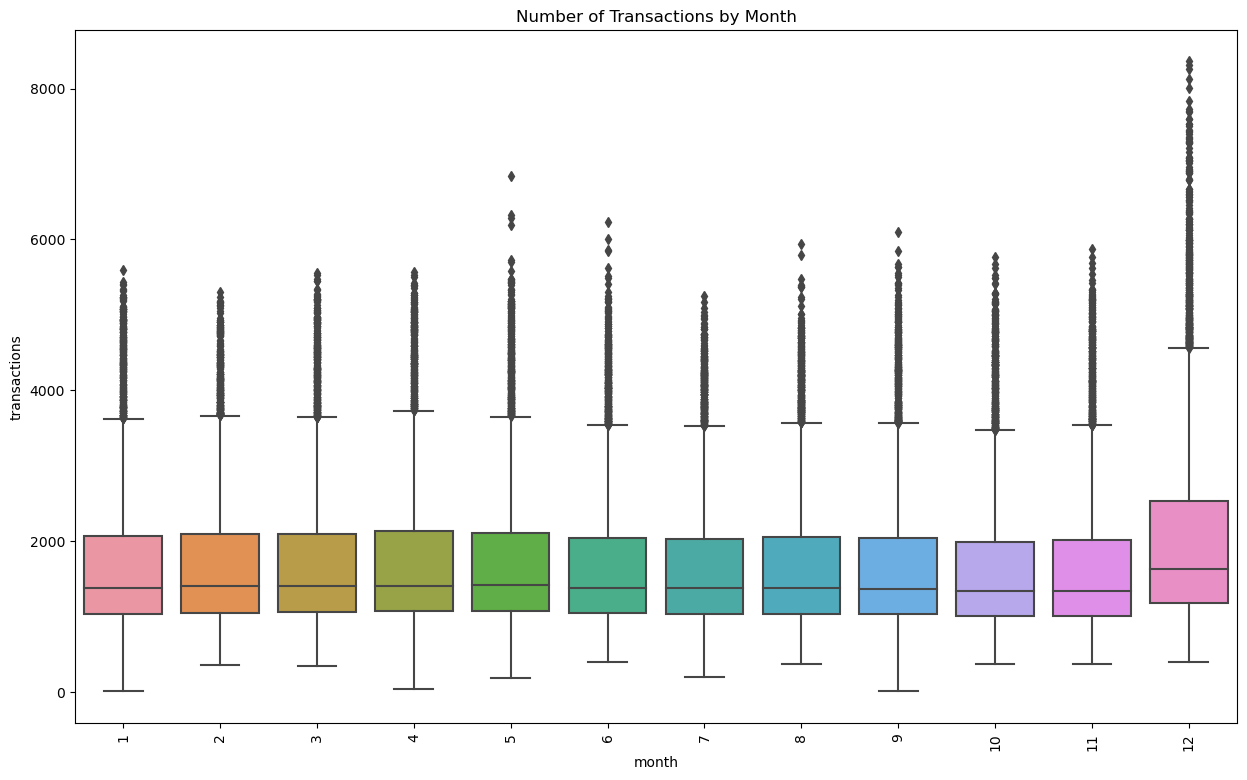

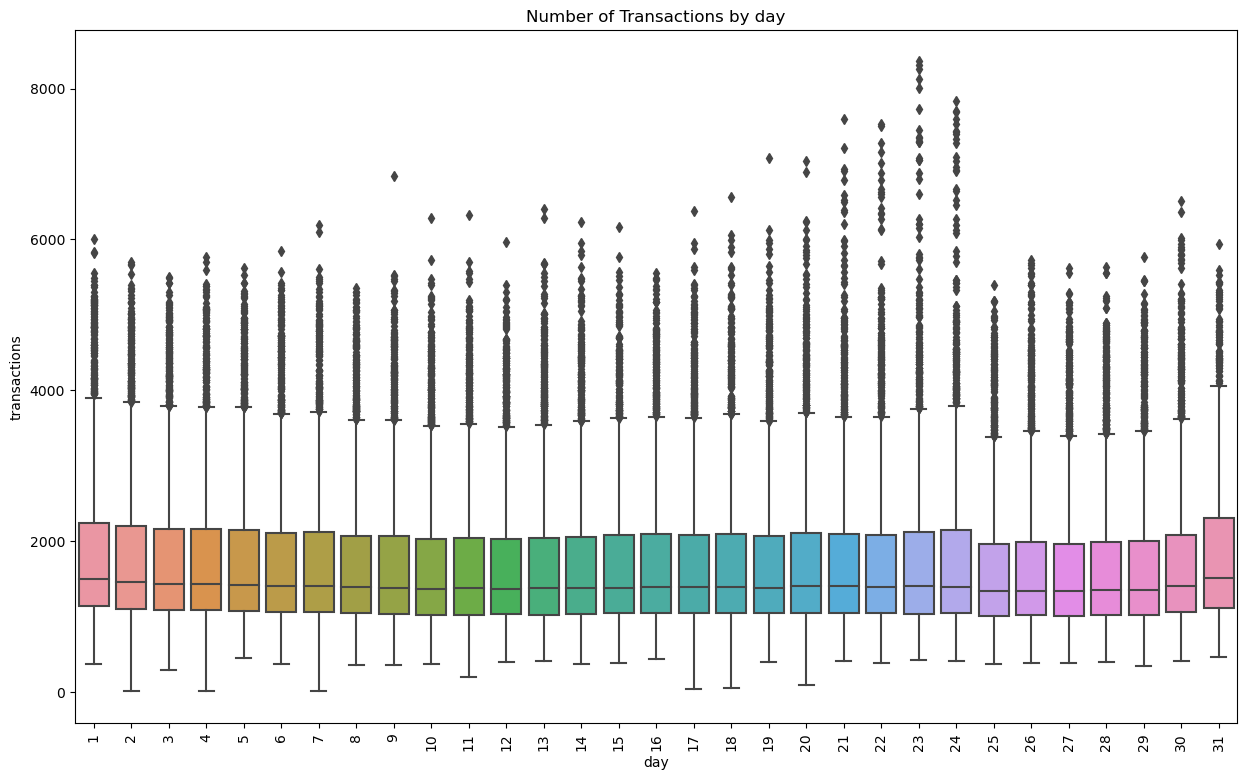

In [15]:
### popularity by month
fig = plt.figure(figsize=(15,9))
sns.boxplot(data = store_rating[store_rating.year != 2017], x = 'month', y ='transactions')
plt.xticks(rotation=90)
plt.title('Number of Transactions by Month')
plt.show()

### popularity by day
fig = plt.figure(figsize=(15,9))
sns.boxplot(data = store_rating, x = 'day', y ='transactions')
plt.xticks(rotation=90)
plt.title('Number of Transactions by day')
plt.show()

#### it is seen that indeed day and month is important to see the number of transactions. Of course then the sales will be higher

In [16]:
#proofing that the stores are not based on the same cluster as the cluster provided
topstores = [
    store_rating.groupby(
        ['store_nbr'])['transactions'].sum().reset_index().sort_values(
        by= 'transactions', ascending = False
    ).head(10).store_nbr.values
][0]
store_rating[store_rating.store_nbr.isin(topstores)].groupby(['cluster','store_nbr'])['store_nbr'].count()

cluster  store_nbr
5        44           1677
6        11           1676
8        3            1676
         8            1676
11       45           1677
         49           1677
14       46           1677
         47           1677
         48           1677
         50           1677
Name: store_nbr, dtype: int64

#### what about by city or by state?

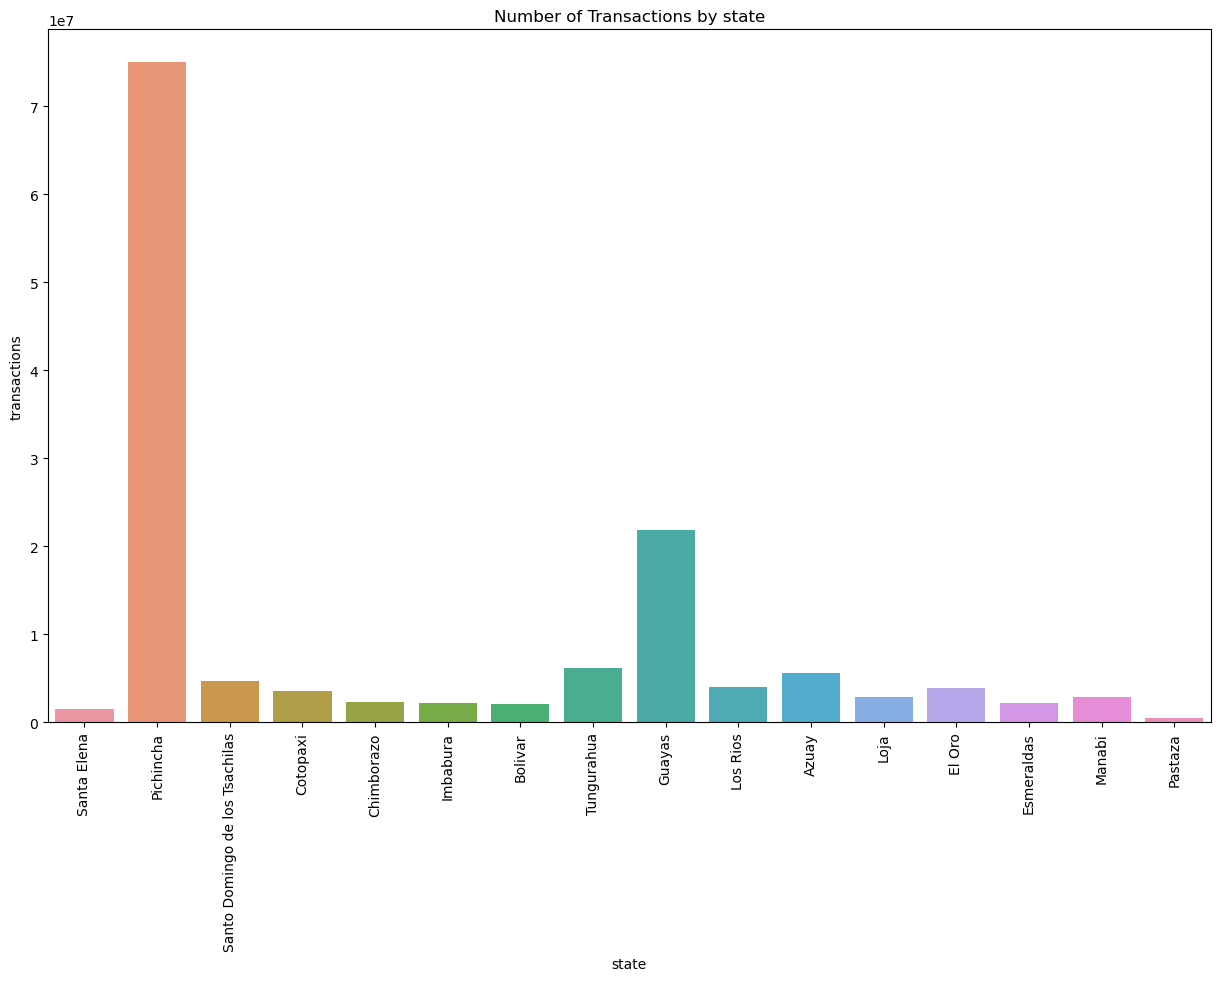

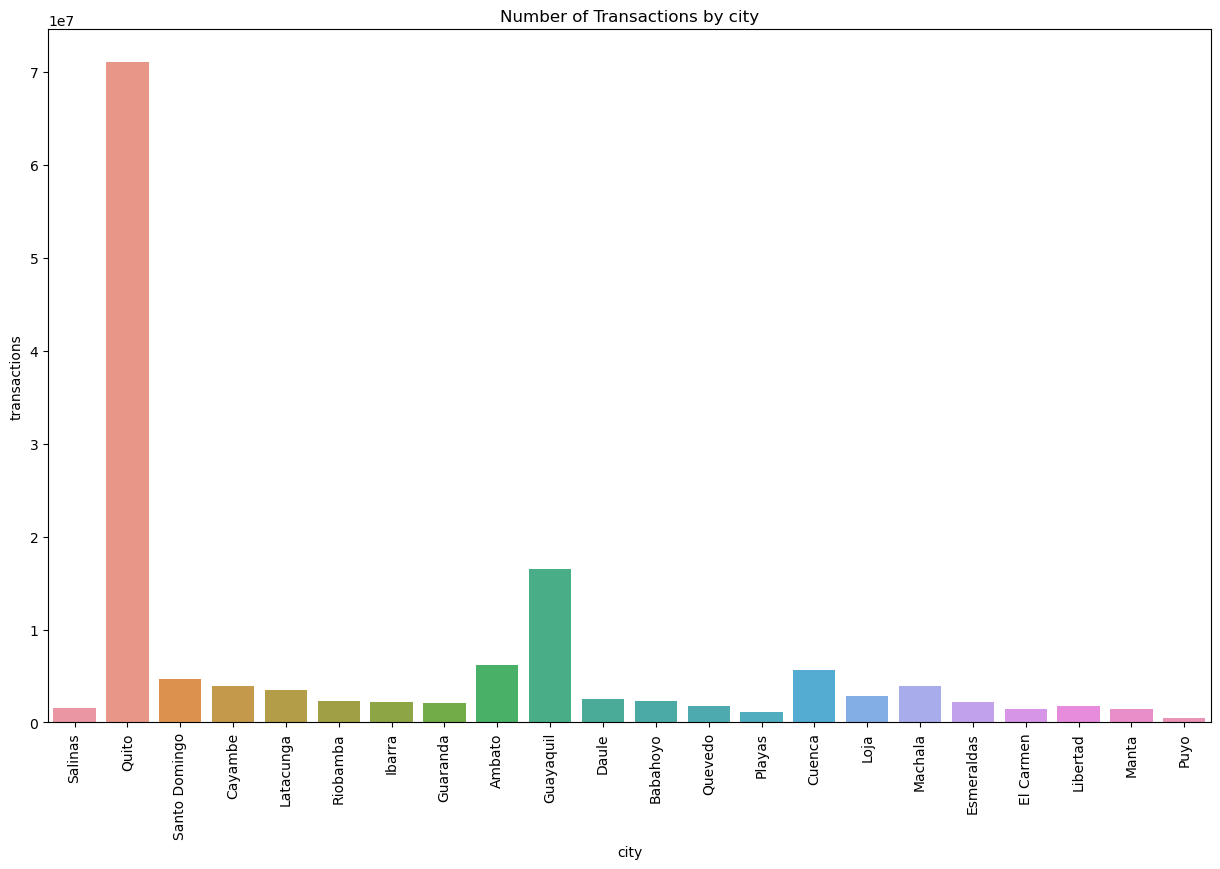

In [17]:
fig = plt.figure(figsize=(15,9))
sns.barplot(data = store_rating, x = 'state', y ='transactions', errorbar = None, estimator = sum)
plt.xticks(rotation=90)
plt.title('Number of Transactions by state')
plt.show()

fig = plt.figure(figsize=(15,9))
sns.barplot(data = store_rating, x = 'city', y ='transactions',errorbar = None, estimator = sum)
plt.xticks(rotation=90)
plt.title('Number of Transactions by city')
plt.show()

#### is this representable by cluster?

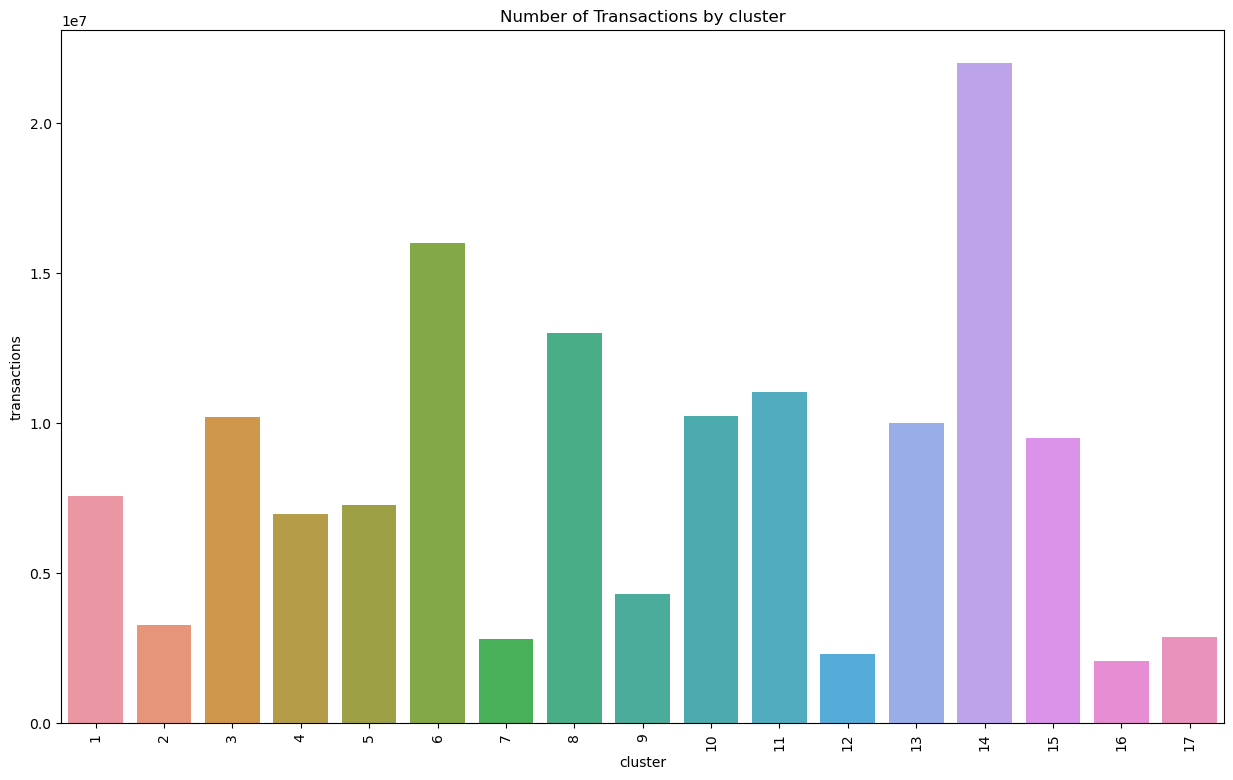

,city,cluster
1,Quito,13
3,Quito,8
4,Quito,9
9,Quito,6
10,Quito,15
17,Quito,12
18,Quito,16
20,Ambato,9
21,Guayaquil,1
23,Guayaquil,10


In [18]:
fig = plt.figure(figsize=(15,9))
sns.barplot(data = store_rating, x = 'cluster', y ='transactions',errorbar = None, estimator = sum)
plt.xticks(rotation=90)
plt.title('Number of Transactions by cluster')
plt.show()

display(store_rating[store_rating.city.isin(['Quito', 'Guayaquil','Ambato','Quenca'])][['city','cluster']].drop_duplicates())

#### what is type?

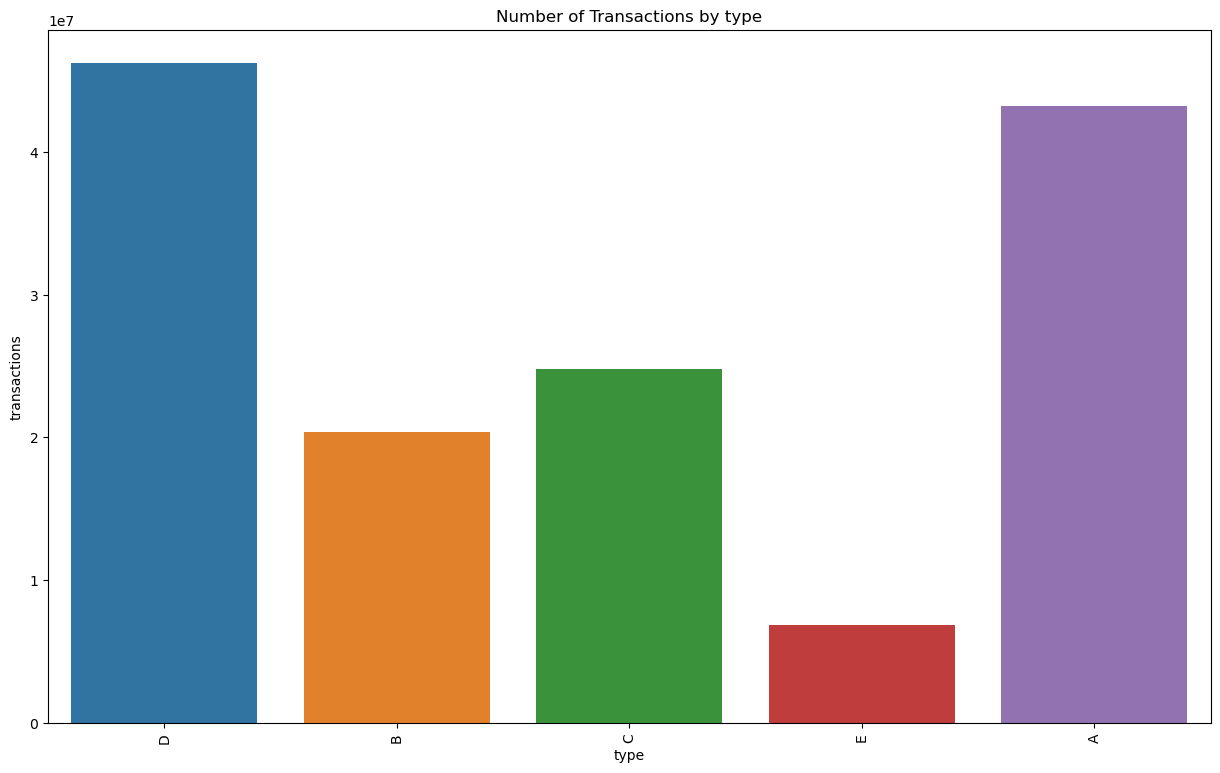

In [19]:
fig = plt.figure(figsize=(15,9))
sns.barplot(data = store_rating, x = 'type', y ='transactions',errorbar = None, estimator = sum)
plt.xticks(rotation=90)
plt.title('Number of Transactions by type')
plt.show()

# Transactions by Holiday type

In [20]:
holiday_rating = holiday_demographic(transactions,holiday)
holiday_rating.fillna('Not a holiday',inplace = True)
holiday_rating.head()

,date,store_nbr,transactions,holiday_type,locale,locale_name,description,transferred,year,month,day
0,2013-01-01,25,770,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1
1,2013-01-02,1,2111,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,2013,1,2
2,2013-01-02,2,2358,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,2013,1,2
3,2013-01-02,3,3487,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,2013,1,2
4,2013-01-02,4,1922,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,2013,1,2


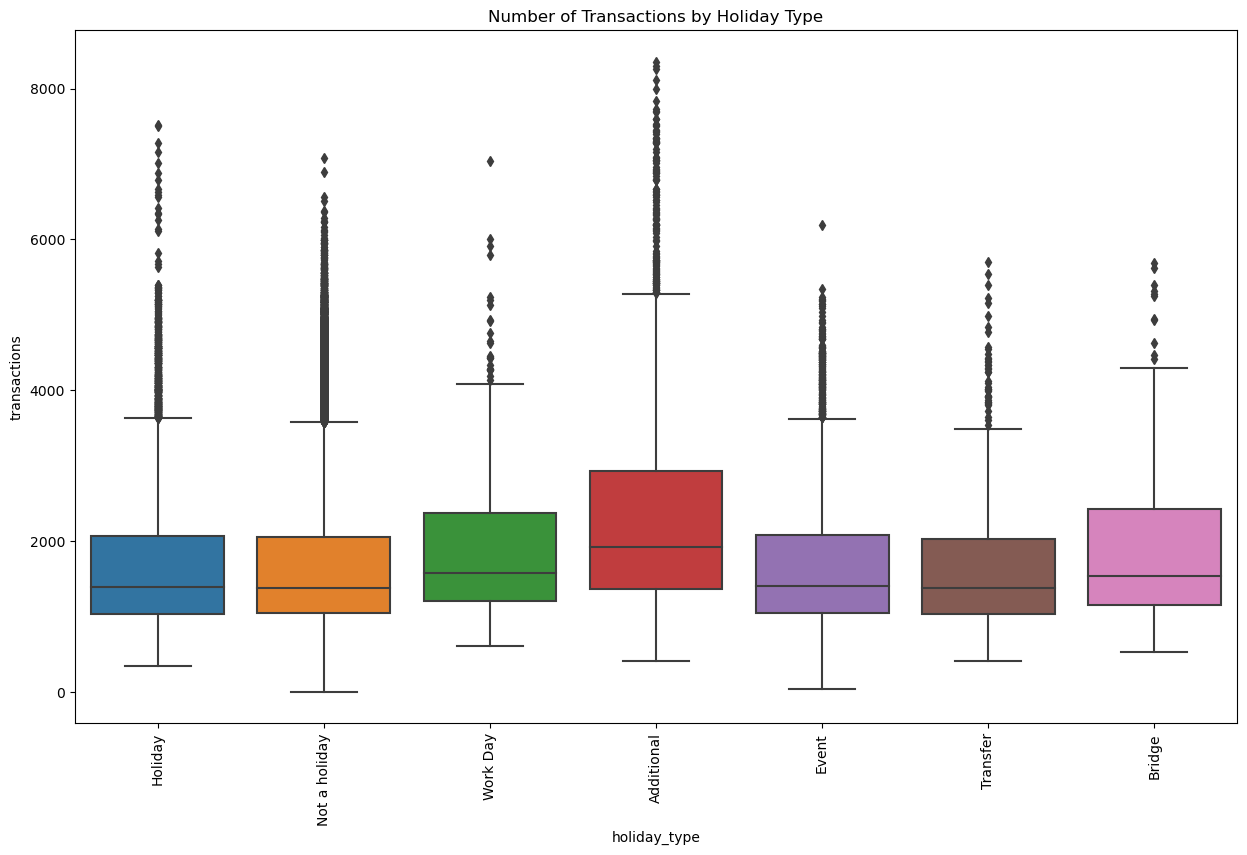

In [21]:
fig = plt.figure(figsize=(15,9))
sns.boxplot(data = holiday_rating, x = 'holiday_type', y ='transactions')
plt.xticks(rotation=90)
plt.title('Number of Transactions by Holiday Type')
plt.show()

#### It's clear that the type of holiday affects the number of transactions made by the costumer.

# Transactions vs Oil Price (Case of Correlation)

In [22]:
oilcorr = oil_effect(transactions,oil)
oilcorr.head()

,date,store_nbr,transactions,dcoilwtico,year,month,day
0,2013-01-01,25,770,NaN,2013,1,1
1,2013-01-02,1,2111,93.14,2013,1,2
2,2013-01-02,2,2358,93.14,2013,1,2
3,2013-01-02,3,3487,93.14,2013,1,2
4,2013-01-02,4,1922,93.14,2013,1,2


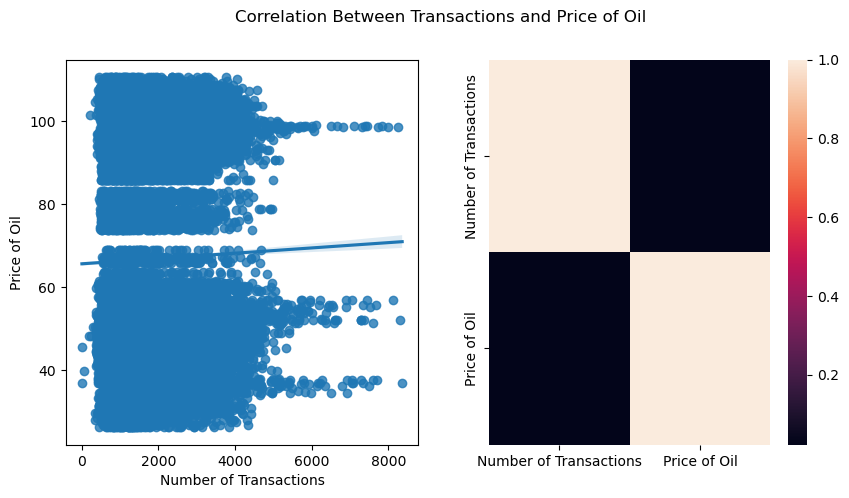

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.regplot(data=oilcorr,x='transactions',y = 'dcoilwtico',ax = ax[0])
ax[0].set_xlabel('Number of Transactions')
ax[0].set_ylabel('Price of Oil')
sns.heatmap(oilcorr[['transactions','dcoilwtico']].corr(),
            xticklabels = ['Number of Transactions','Price of Oil'],
            yticklabels = ['Number of Transactions','Price of Oil'],
            ax = ax[1])
ax[0].set_xlabel('Number of Transactions')
ax[0].set_ylabel('Price of Oil')
plt.suptitle('Correlation Between Transactions and Price of Oil')
plt.show()

#### We can see that there is absolutely no correlation between price of oil and number of transactions

#### Temporary summary from data exploration:<br />
keep city, state, day, month, cluster, type of transaction, and holiday_type meta data. discard oil price and non relevant features.

# Begin wrangle

In [24]:
data = wrangle(train)
data.head()

,unit_sales,onpromotion,city,state,store_type,cluster,family,perishable,holiday_type,month,day
0,1.0,False,Quito,Pichincha,D,13,GROCERY I,0,Holiday,4,1
1,3.0,False,Quito,Pichincha,D,13,BREAD/BAKERY,1,Holiday,4,1
2,1.0,False,Quito,Pichincha,D,13,GROCERY I,0,Holiday,4,1
3,11.0,False,Quito,Pichincha,D,13,GROCERY I,0,Holiday,4,1
4,4.0,False,Quito,Pichincha,D,13,GROCERY I,0,Holiday,4,1


#### What type of items are sold the most?

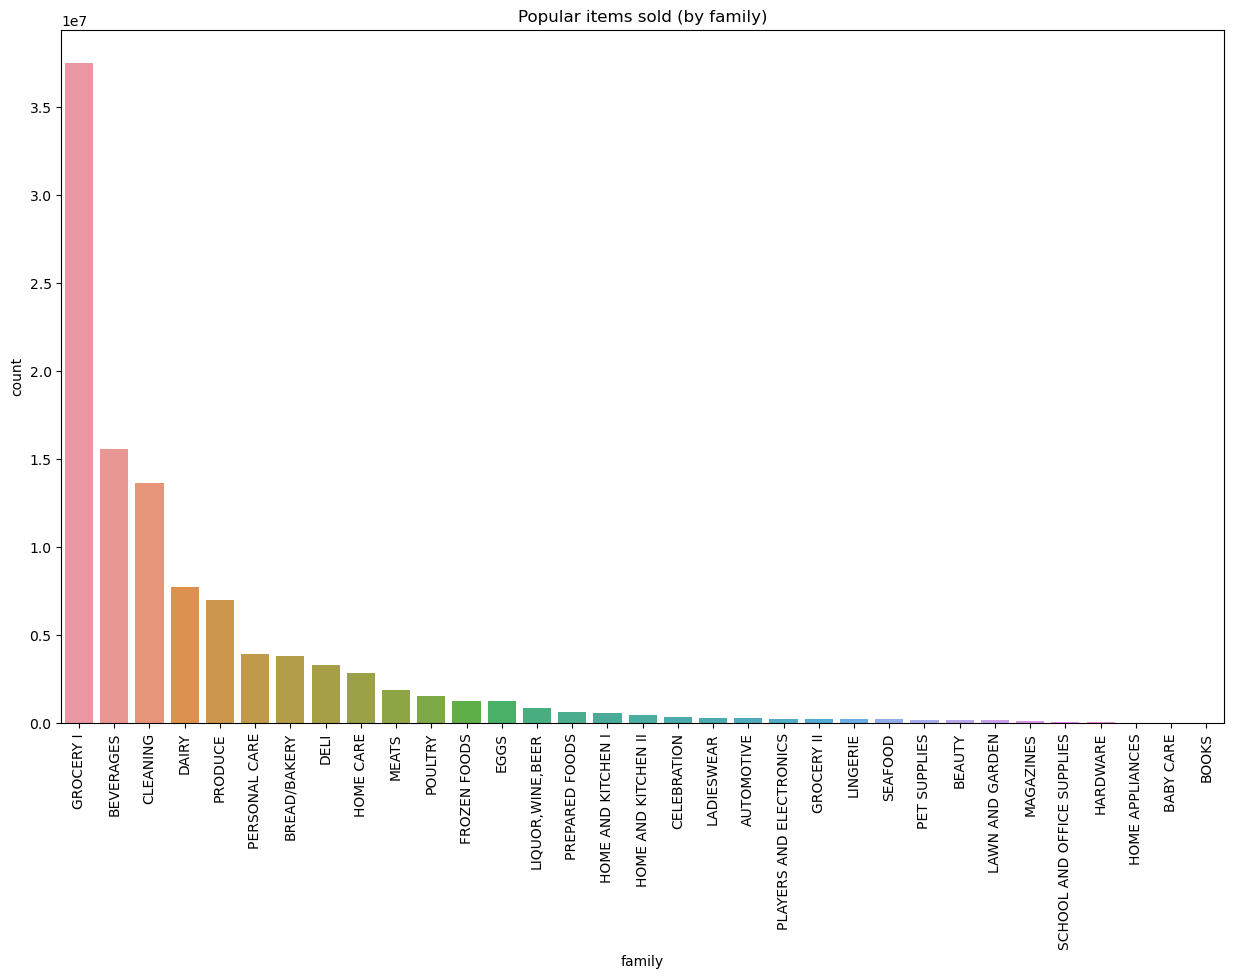

In [25]:
fig = plt.figure(figsize=(15,9))
sns.countplot(x=data['family'], order = data['family'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Popular items sold (by family)")
plt.show()

by frequency, these items showed up the most

how to differentiate metrics in the unit sales?

In [26]:
### creating metrics
#analyze metrics
byfamily = data.groupby('family')['unit_sales'].mean()
byfamily

family
AUTOMOTIVE                     1.710936
BABY CARE                      1.886702
BEAUTY                         1.916427
BEVERAGES                     12.158297
BOOKS                          2.319730
BREAD/BAKERY                   8.909447
CELEBRATION                    2.108176
CLEANING                       5.639394
DAIRY                          7.049221
DELI                           5.965313
EGGS                          10.062051
FROZEN FOODS                   9.197558
GROCERY I                      7.368795
GROCERY II                     6.885884
HARDWARE                       1.487982
HOME AND KITCHEN I             3.290614
HOME AND KITCHEN II            3.164140
HOME APPLIANCES                1.709752
HOME CARE                      5.510537
LADIESWEAR                     2.340056
LAWN AND GARDEN                3.304921
LINGERIE                       2.126180
LIQUOR,WINE,BEER               7.226919
MAGAZINES                      2.711882
MEATS                         12.

From this, we can assume which metric will a family usually use certain metrics. Of course, for some item family our assumption will be weak. we can tweak it later

#### What if we group them by class of items?

Shows pattern but has high cardinallity. We can drop class.

drop store_nbr and item_nbr too because it's noisy for the model

#### Check cardinallity and correlation

In [27]:
data.select_dtypes('object').nunique()

onpromotion      2
city            22
state           16
store_type       5
family          33
holiday_type     6
dtype: int64

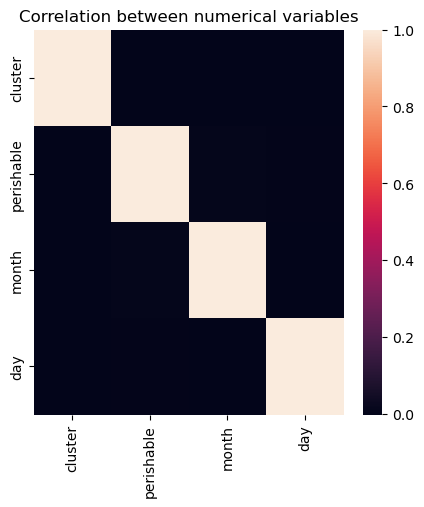

In [28]:
fig = plt.figure(figsize=(5,5))
sns.heatmap(data.select_dtypes('number').drop(columns = 'unit_sales').corr())
plt.xticks(rotation=90)
plt.title('Correlation between numerical variables')
plt.show()

what about correlation with the target?

In [29]:
data.select_dtypes('number').corr()['unit_sales']

unit_sales    1.000000
cluster       0.022506
perishable    0.056548
month         0.011871
day          -0.010634
Name: unit_sales, dtype: float64

correlation with the target variable itself is very low. This means it lacks feature engineering.

extract data for now and check with classification

In [30]:
data.holiday_type.fillna('Not a working day',inplace = True)

In [31]:
data.to_csv('cleandata.csv',index = False)